In [33]:
import pandas as pd

df = pd.read_csv("../data/All_Pokemon_cleaned.csv")
df

,number,name,type_1,type_2,abilities,hp,att,def,spa,spd,...,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,height,weight,bmi,bmi_clipped
0,1,bulbasaur,grass,poison,"['chlorophyll', 'overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,14.1
1,2,ivysaur,grass,poison,"['chlorophyll', 'overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0,13.0
2,3,venusaur,grass,poison,"['chlorophyll', 'overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0,25.0
3,3,mega_venusaur,grass,poison,['thick fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,27.0
4,4,charmander,fire,none,"['blaze', 'solar power']",39,52,43,60,50,...,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,glastrier,ice,none,['chilling neigh'],100,145,130,65,110,...,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3,100.0
1028,897,spectrier,ghost,none,['grim neigh'],100,65,60,145,80,...,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1,11.1
1029,898,calyrex,psychic,grass,['unnerve'],100,80,80,80,80,...,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4,6.4
1030,898,calyrex_ice_rider,psychic,ice,['as one'],100,165,150,85,130,...,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5,100.0


In [34]:
unnecesary_columns = [
    "number",
    "name",
    "mean",
    "standard_deviation",
    "abilities",
    "bmi",
]
df.drop(unnecesary_columns, axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap
import xgboost as xgb

In [36]:
le1 = LabelEncoder()
df["type_1"] = le1.fit_transform(df["type_1"])

le2 = LabelEncoder()
df["type_2"] = le2.fit_transform(df["type_2"])

df.head()

,type_1,type_2,hp,att,def,spa,spd,spe,bst,generation,...,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,height,weight,bmi_clipped
0,9,14,45,49,49,65,65,45,318,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,9,14,60,62,63,80,80,60,405,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,9,14,80,82,83,100,100,80,525,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,9,14,80,100,123,122,120,80,625,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,6,12,39,52,43,60,50,65,309,1.0,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [37]:
# One-hot encode the 'experience_type' column
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
df_exp = pd.DataFrame(ohe.fit_transform(df[["experience_type"]]))
df_exp.columns = ohe.get_feature_names_out(["experience_type"])

df = pd.concat([df.drop("experience_type", axis=1), df_exp], axis=1)
df

,type_1,type_2,hp,att,def,spa,spd,spe,bst,generation,...,against_fairy,height,weight,bmi_clipped,experience_type_Erratic,experience_type_Fast,experience_type_Fluctuating,experience_type_Medium Fast,experience_type_Medium Slow,experience_type_Slow
0,9,14,45,49,49,65,65,45,318,1.0,...,0.5,0.7,6.9,14.1,0.0,0.0,0.0,0.0,1.0,0.0
1,9,14,60,62,63,80,80,60,405,1.0,...,0.5,1.0,13.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9,14,80,82,83,100,100,80,525,1.0,...,0.5,2.0,100.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9,14,80,100,123,122,120,80,625,6.0,...,0.5,2.4,155.5,27.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6,12,39,52,43,60,50,65,309,1.0,...,0.5,0.6,8.5,23.6,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,11,12,100,145,130,65,110,30,580,8.0,...,1.0,2.2,800.0,100.0,0.0,0.0,0.0,0.0,0.0,1.0
1028,8,12,100,65,60,145,80,130,580,8.0,...,1.0,2.0,44.5,11.1,0.0,0.0,0.0,0.0,0.0,1.0
1029,14,9,100,80,80,80,80,80,500,8.0,...,1.0,1.1,7.7,6.4,0.0,0.0,0.0,0.0,0.0,1.0
1030,14,11,100,165,150,85,130,50,680,8.0,...,1.0,2.4,809.1,100.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
X = df.drop(["type_1", "type_2"], axis=1)
y = df["type_1"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (825, 42)
X_test.shape: (207, 42)


C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:44:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy (regularized XGBoost): 0.8792270531400966
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.78      0.64      0.70        11
           2       0.75      1.00      0.86         6
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         5
           5       1.00      0.83      0.91        12
           6       0.88      0.94      0.91        16
           7       1.00      1.00      1.00         1
           8       0.88      0.88      0.88         8
           9       0.71      0.94      0.81        18
          10       0.80      0.67      0.73         6
          11       1.00      0.78      0.88         9
          12       0.93      0.97      0.95        29
          13       1.00      0.75      0.86        12
          14       0.86      0.86      0.86         7
          15       0.89      0.89      0.89         9
          16       0.57  

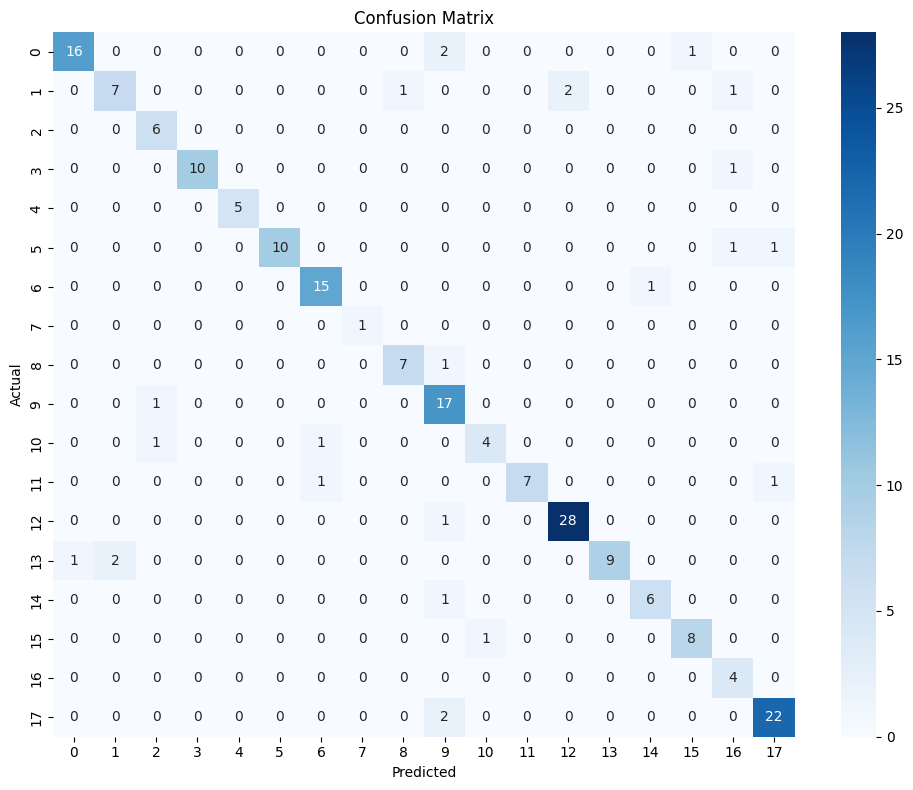

In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    max_depth=4,  # Lower max_depth to reduce complexity
    n_estimators=100,  # More trees but with early stopping
    learning_rate=0.05,  # Lower learning rate
    subsample=0.8,  # Use 80% of data for each tree
    colsample_bytree=0.8,  # Use 80% of features for each tree
    min_child_weight=5,  # Increase to make model more conservative
    reg_alpha=1,  # Add L1 regularization
    reg_lambda=1,  # Add L2 regularization
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42,
)

# Fit the model without early stopping (not supported in this XGBoost version)
xgb_model.fit(
    X_train,
    y_train,
    verbose=True,
)

y_pred = xgb_model.predict(X_test)
print("Test Accuracy (regularized XGBoost):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

x_train_pred = xgb_model.predict(X_train)
print("Train Accuracy (regularized XGBoost):", accuracy_score(y_train, x_train_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [40]:
x_train_pred = xgb_model.predict(X_train)
x_train_accuracy = accuracy_score(y_train, x_train_pred)
print("Train Accuracy:", x_train_accuracy)
print(classification_report(y_train, x_train_pred))

Train Accuracy: 0.9393939393939394
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        62
           1       0.87      0.94      0.90        35
           2       0.85      0.94      0.89        36
           3       0.98      0.92      0.95        48
           4       0.94      0.94      0.94        17
           5       1.00      0.83      0.91        30
           6       0.98      0.96      0.97        48
           7       1.00      0.43      0.60         7
           8       0.94      0.97      0.96        33
           9       0.94      0.99      0.96        73
          10       0.92      0.94      0.93        35
          11       0.96      0.86      0.91        29
          12       0.99      0.99      0.99        85
          13       0.96      0.89      0.93        28
          14       1.00      0.94      0.97        70
          15       0.86      0.98      0.92        50
          16       0.78      1.00      0.88   

=== DEBUGGING SHAP VALUES STRUCTURE ===
X_test.shape: (207, 42)
Type of shap_values: <class 'numpy.ndarray'>
Unique classes in y_test: 18
Unique classes in y_train: 18
SHAP values structure: 207 samples, 42 features, 18 classes
Generating SHAP summary plot...


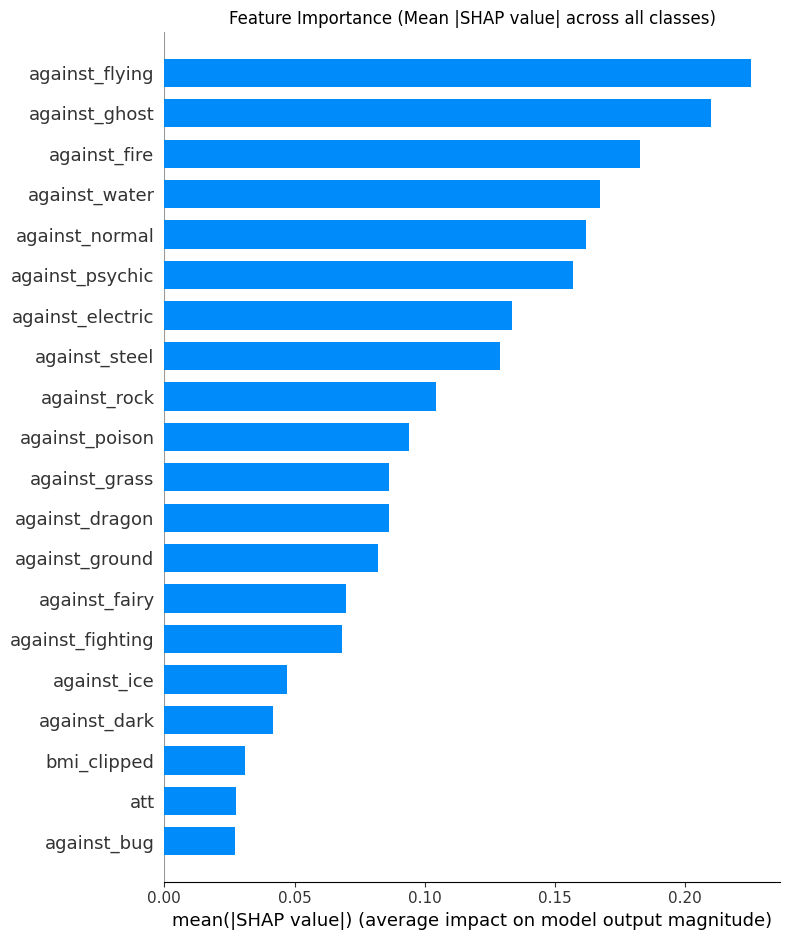

Generating detailed SHAP summary plot for first class...


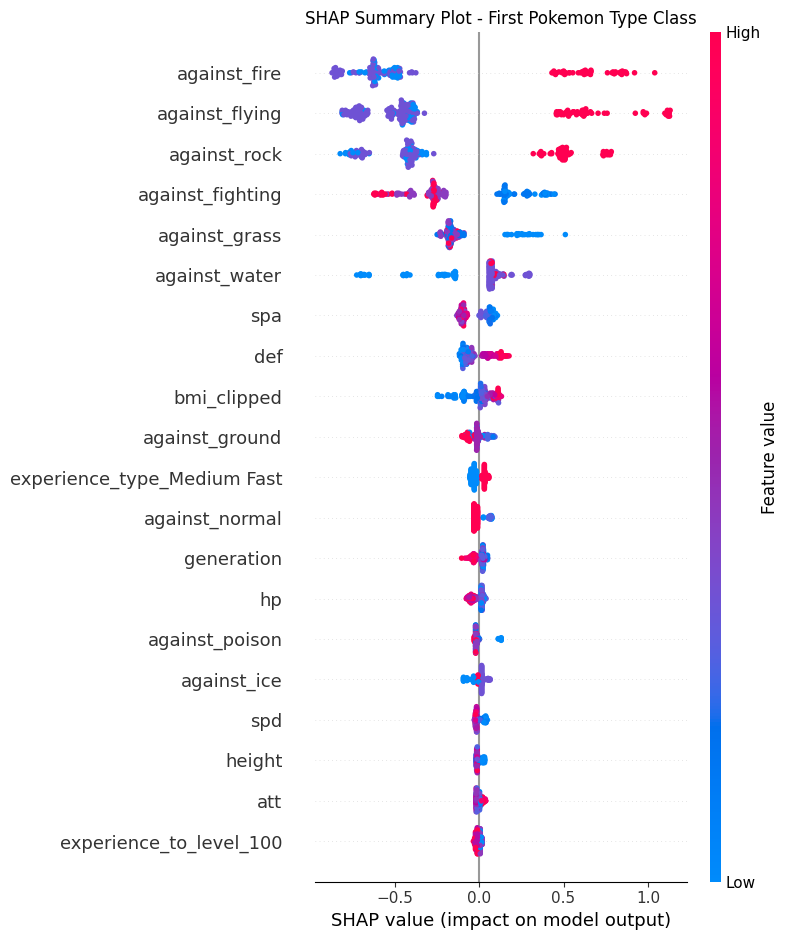

Explaining a single prediction...


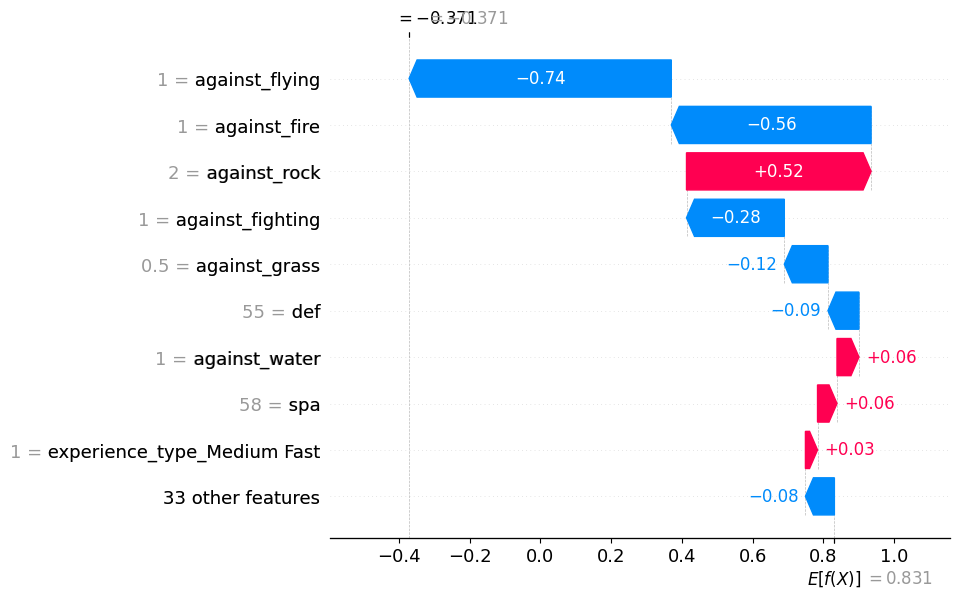


Top 10 Most Important Features (averaged across all classes and samples):
                        feature  importance
24               against_flying    0.225085
28                against_ghost    0.209790
16                 against_fire    0.182568
17                against_water    0.167127
15               against_normal    0.161785
25              against_psychic    0.156810
18             against_electric    0.133626
31                against_steel    0.128920
27                 against_rock    0.104266
22               against_poison    0.093874
19                against_grass    0.086359
29               against_dragon    0.086264
23               against_ground    0.082125
32                against_fairy    0.069715
21             against_fighting    0.068267
20                  against_ice    0.047205
30                 against_dark    0.041835
35                  bmi_clipped    0.030959
1                           att    0.027585
26                  against_bug    0.027190
5

C:\Users\Abhishek Shrestha\AppData\Local\Temp\ipykernel_22760\2754387445.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="importance", y="feature", palette="viridis")


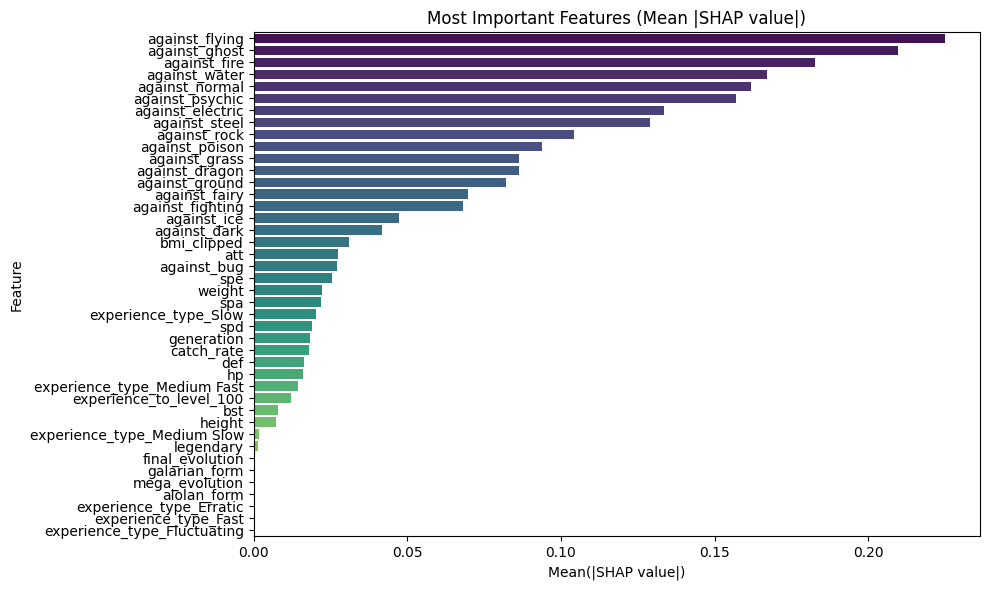


Top 10 Most Important Features for Class 0:
                        feature  importance
16                 against_fire    0.628935
24               against_flying    0.590078
27                 against_rock    0.510092
21             against_fighting    0.296067
19                against_grass    0.177231
17                against_water    0.162717
3                           spa    0.078854
2                           def    0.078727
35                  bmi_clipped    0.059296
23               against_ground    0.037366
39  experience_type_Medium Fast    0.032037
15               against_normal    0.029268
7                    generation    0.028087
0                            hp    0.027709
22               against_poison    0.022133
20                  against_ice    0.021254
4                           spd    0.020921
33                       height    0.015205
1                           att    0.012917
8       experience_to_level_100    0.012671
5                           spe

In [ ]:
# Create SHAP explainer for tree-based models
explainer = shap.TreeExplainer(xgb_model)



# Calculate SHAP values for the test set (or a subset if it's large)


shap_values = explainer.shap_values(X_test)



# Debug SHAP values structure


print("=== DEBUGGING SHAP VALUES STRUCTURE ===")


print(f"X_test.shape: {X_test.shape}")


print(f"Type of shap_values: {type(shap_values)}")



# Check unique classes in your target


print(f"Unique classes in y_test: {len(pd.Series(y_test).unique())}")


print(f"Unique classes in y_train: {len(pd.Series(y_train).unique())}")



# If shap_values is a list (multi-class), convert to array


if isinstance(shap_values, list):


    shap_values = np.stack(shap_values, axis=2)  # (samples, features, classes)

print(

    f"SHAP values structure: {shap_values.shape[0]} samples, {shap_values.shape[1]} features, {shap_values.shape[2]} classes"
)



# 1. Feature importance across all classes (averaged)


print("Generating SHAP summary plot...")


shap_values_avg = np.mean(np.abs(shap_values), axis=2)


shap.summary_plot(shap_values_avg, X_test, plot_type="bar", show=False)


plt.title("Feature Importance (Mean |SHAP value| across all classes)")


plt.tight_layout()


plt.show()



# 2. Summary plot for first class (class 0)


print("Generating detailed SHAP summary plot for first class...")


shap_values_class0 = shap_values[:, :, 0]


shap.summary_plot(shap_values_class0, X_test, show=False)


plt.title("SHAP Summary Plot - First Pokemon Type Class")


plt.tight_layout()


plt.show()



# 3. Waterfall plot for single prediction (first sample, class 0)


print("Explaining a single prediction...")


explanation = shap.Explanation(
    values=shap_values[0, :, 0],
    base_values=explainer.expected_value[0],
    data=X_test.iloc[0].values,
    feature_names=X_test.columns.tolist(),
)



shap.waterfall_plot(explanation)



# 4. Calculate feature importance correctly


feature_importance = pd.DataFrame(
    {
        "feature": X_test.columns,
        "importance": np.mean(np.abs(shap_values), axis=(0, 2)),
    }
).sort_values("importance", ascending=False)



print("\nTop 10 Most Important Features (averaged across all classes and samples):")
print(feature_importance)



plt.figure(figsize=(10, 6))


sns.barplot(data=feature_importance, x="importance", y="feature", palette="viridis")


plt.title("Most Important Features (Mean |SHAP value|)")


plt.xlabel("Mean(|SHAP value|)")


plt.ylabel("Feature")


plt.tight_layout()


plt.show()



# 5. Alternative: Feature importance for specific class (first class)


feature_importance_class0 = pd.DataFrame(
    {
        "feature": X_test.columns,
        "importance": np.mean(np.abs(shap_values[:, :, 0]), axis=0),
    }
).sort_values("importance", ascending=False)



print(f"\nTop 10 Most Important Features for Class 0:")


print(feature_importance_class0)



print(f"\nModel has {shap_values.shape[2]} classes (Pokemon types)")


print("SHAP values calculated for all samples, features, and classes")

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [1, 2],
}

xgb_clf = XGBClassifier(
    use_label_encoder=False, eval_metric="mlogloss", random_state=42
)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model_obtained_by_grid_cv = grid_search.best_estimator_

cv_scores = cross_val_score(best_model_obtained_by_grid_cv, X_train, y_train, cv=5)
print("Cross-validation scores (GridSearchCV best model):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

best_model_obtained_by_grid_cv.fit(X_train, y_train)
y_train_pred = best_model_obtained_by_grid_cv.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy (GridSearchCV best model):", train_accuracy)
print(classification_report(y_train, y_train_pred))

y_pred = best_model_obtained_by_grid_cv.predict(X_test)
print("Test Accuracy (GridSearchCV best model):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:58:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found by GridSearchCV: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best cross-validation score: 0.8715151515151515


C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:58:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:06] WARNING: C:\a

Cross-validation scores (GridSearchCV best model): [0.87878788 0.86666667 0.83636364 0.91515152 0.88484848]
Mean cross-validation score: 0.8763636363636363


C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Accuracy (GridSearchCV best model): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        73
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        85
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        50
          16       1.00      1.00  

In [ ]:
import optuna


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_categorical("max_depth", [3, 4, 6]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 1, 2),
        "use_label_encoder": False,
        "eval_metric": "mlogloss",
        "random_state": 42,
    }
    clf = XGBClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score


study = optuna.create_study(direction="maximize")


study.optimize(objective, n_trials=30)


print("Best parameters found by Optuna:", study.best_params)


print("Best cross-validation score:", study.best_value)

# Use the best parameters to train and evaluate the model
best_model_obtained_by_optuna = XGBClassifier(
    **study.best_params,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)


cv_scores = cross_val_score(best_model_obtained_by_optuna, X_train, y_train, cv=5)
print("Cross-validation scores (Optuna best model):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())



best_model_obtained_by_optuna.fit(X_train, y_train)
y_train_pred = best_model_obtained_by_optuna.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


print("Train Accuracy (Optuna best model):", train_accuracy)
print(classification_report(y_train, y_train_pred))

y_pred = best_model_obtained_by_optuna.predict(X_test)


print("Test Accuracy (Optuna best model):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[I 2025-06-04 18:59:45,072] A new study created in memory with name: no-name-7baac0e5-8859-448f-abbb-e3df44b16e3c
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:59:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shre

Best parameters found by Optuna: {'n_estimators': 182, 'max_depth': 6, 'learning_rate': 0.09223624315881979, 'subsample': 0.9283083033227918, 'colsample_bytree': 0.8203364600531555, 'min_child_weight': 3, 'reg_alpha': 0.6311829428671281, 'reg_lambda': 1.4061587732791885}
Best cross-validation score: 0.8630303030303029


C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:13:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:13:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:14:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:14:13] WARNING: C:\a

Cross-validation scores (Optuna best model): [0.87878788 0.86060606 0.80606061 0.88484848 0.86666667]
Mean cross-validation score: 0.8593939393939394


C:\Users\Abhishek Shrestha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:14:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Accuracy (Optuna best model): 0.9975757575757576
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        48
           4       1.00      0.94      0.97        17
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        48
           7       1.00      0.86      0.92         7
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        73
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        85
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        70
          15       1.00      1.00      1.00        50
          16       0.97   